## Titanic 02 Template for Exploratory Data Analysis 
#### Writting formulas & Plotting.

### 1. Load python packages used

In [6]:
# Basic libs
import pandas as pd
import numpy as np
# Loading the plotting libraries.
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-notebook')
from matplotlib.ticker import StrMethodFormatter
from IPython.display import display, HTML
from IPython.display import Math, Latex

### 2. Drawing Formulas

In [7]:
Math(r'F(k) = \int_{-\infty}^{\infty} log(x) . f(x) e^{2\pi k} dx')

<IPython.core.display.Math object>

In [8]:
Latex(r"""\begin{eqnarray}
\nabla \times \vec{\mathbf{B}} -\, \frac1c\, \frac{\partial\vec{\mathbf{E}}}{\partial t} & = \frac{4\pi}{c}\vec{\mathbf{j}} \\
\nabla \cdot \vec{\mathbf{E}} & = 4 \pi \rho \\
\nabla \times \vec{\mathbf{E}}\, +\, \frac1c\, \frac{\partial\vec{\mathbf{B}}}{\partial t} & = \vec{\mathbf{0}} \\
\nabla \cdot \vec{\mathbf{B}} & = 0 
\end{eqnarray}""")

<IPython.core.display.Latex object>

### 2. Loading the data.

In [9]:
train_df = pd.read_csv("./data/train.csv")
test_df = pd.read_csv("./data/test.csv")

In [10]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### 3. Color Table to use in the plottings.

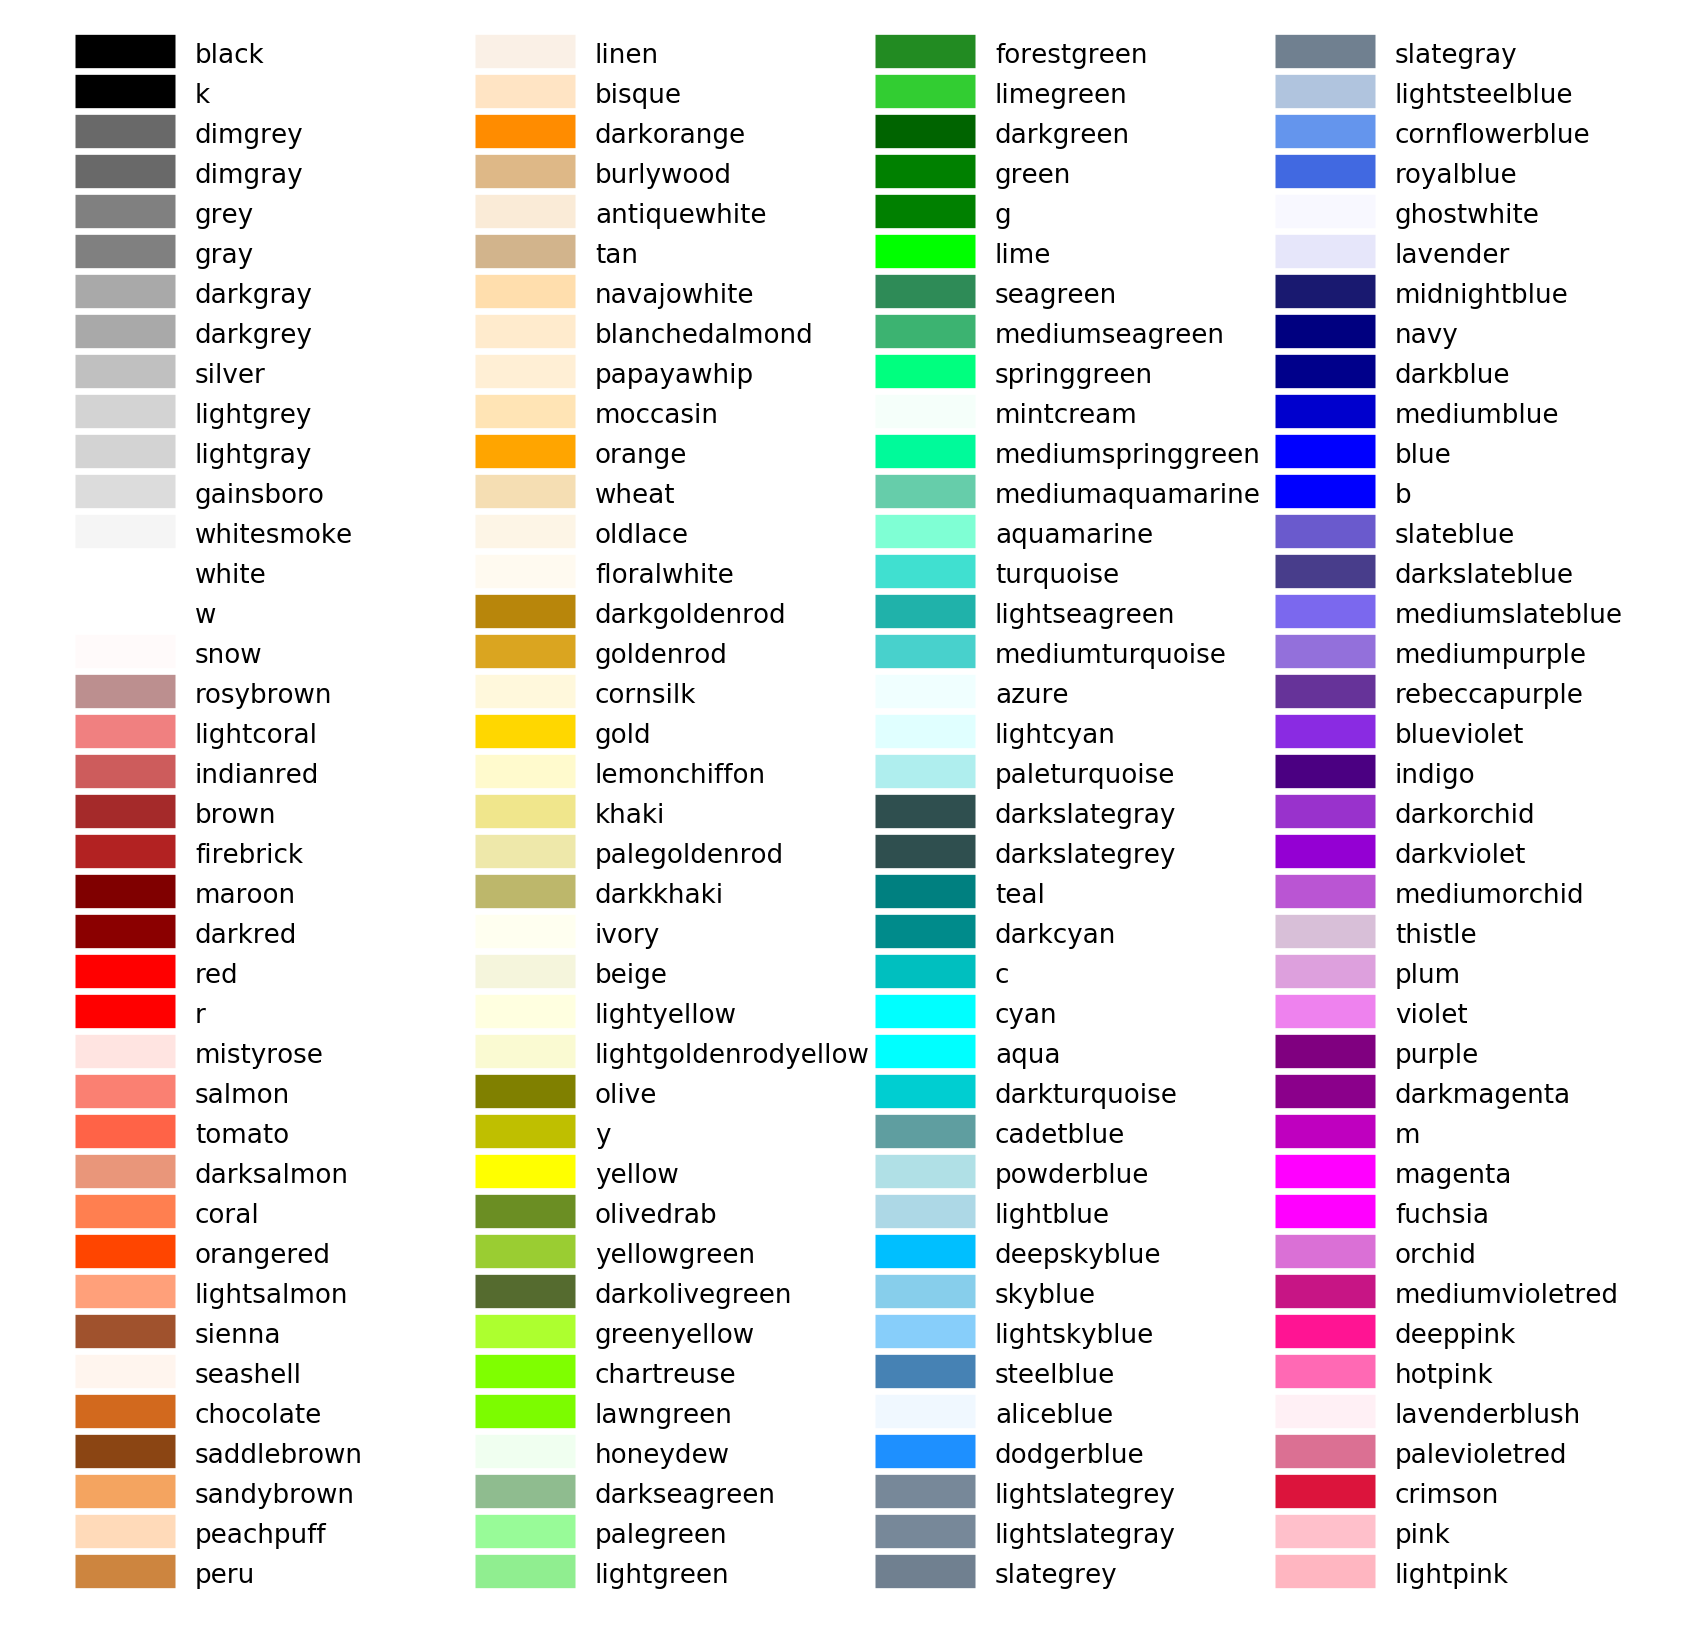

### 5. Palettes = collection of related colors.

https://colorbrewer2.org/#type=sequential&scheme=BuGn&n=3

### 6. Exploring and Questions.

#### 6.1. How Age influences the survival of Male and Female.

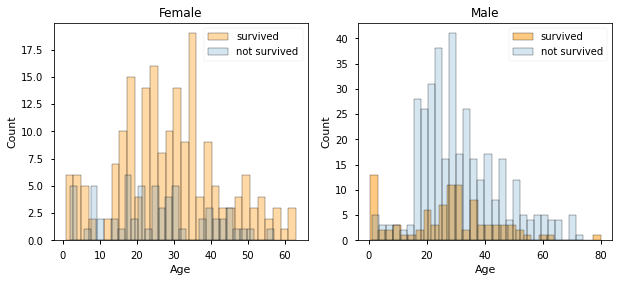

In [13]:
survived = 'survived'
not_survived = 'not survived'
female = train_df[train_df['Sex']=='female']
male = train_df[train_df['Sex']=='male']
# --- Graphs ---
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
ax = sns.histplot(female[female['Survived']==1].Age.dropna(), bins=30, 
                  label=survived, 
                  ax=axes[0], # First plot
                  kde=False, color="#feb24c", alpha=0.5)
ax = sns.histplot(female[female['Survived']==0].Age.dropna(), bins=30, 
                  label = not_survived, ax = axes[0], kde =False,
                  color="#3182bd", alpha=0.2)
ax.legend()
ax.set_title('Female')

ax = sns.histplot(male[male['Survived']==1].Age.dropna(), bins=30, 
                  label = survived, 
                  ax = axes[1], # Second plot
                  kde = False, color="#feb24c", alpha=0.7)
ax = sns.histplot(male[male['Survived']==0].Age.dropna(), bins=30, 
                  label = not_survived, ax = axes[1], kde = False,
                  color="#3182bd", alpha=0.2)
ax.legend()
_ = ax.set_title('Male')

#### 6.2. How passenger Age is distributed accross Passenger Classes

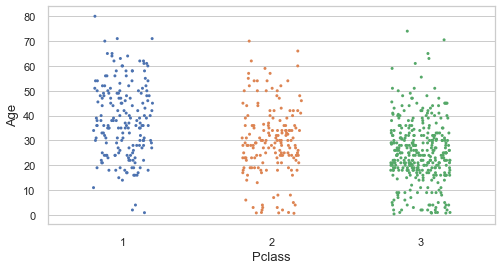

In [18]:
sns.set(style="whitegrid", color_codes=True)
x="Pclass"; y="Age"
plt.figure(figsize=(8,4))
sns.stripplot(x=x, y=y, data=train_df, 
              jitter=0.2, 
              dodge=True,
              size=3)
plt.xlabel(x, fontsize=13)
plt.ylabel(y, fontsize=13)
plt.show(); 

#### 6.3 How passenger Age is distributed accross Ticket Classes (Another view)

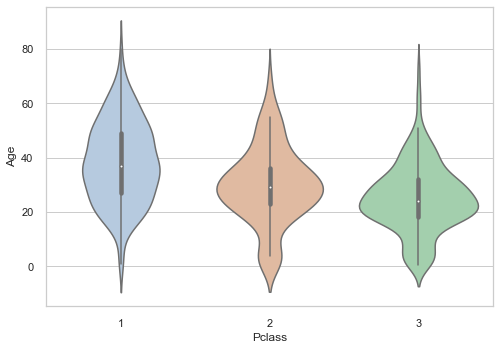

In [8]:
ax = sns.violinplot(x="Pclass", y="Age", palette='pastel', data=train_df, saturation=0.5)

#### 6.4 Survivability distribution accross Enbarked, Passenger Class and Gender.

<AxesSubplot:xlabel='Sex', ylabel='Age'>

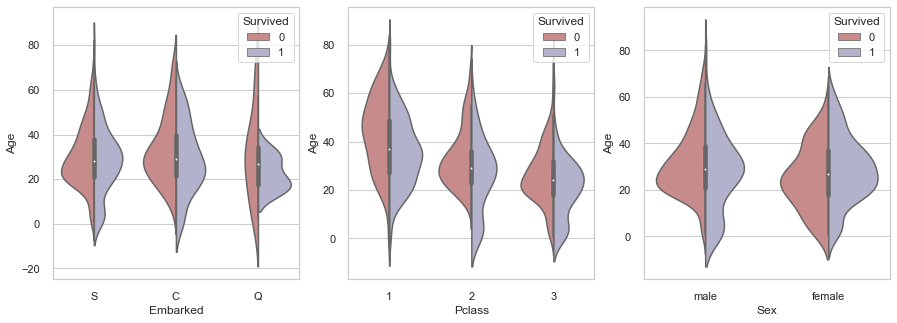

In [9]:
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)
custom_colors = ["#e76c6c","#a5a5d9"]
pastel = 'pastel'
sns.violinplot(
    x="Embarked", y="Age", hue="Survived", data=train_df, split=True, ax=ax1, 
    palette=custom_colors, 
    saturation=0.5)
sns.violinplot(
    x="Pclass", y="Age", hue="Survived", data=train_df, split=True, ax=ax2,
    palette=custom_colors, saturation=0.5)
sns.violinplot(
    x="Sex", y="Age", hue="Survived", data=train_df, split=True, ax=ax3,
    palette=custom_colors, saturation=0.5)

#### 6.4. How many people embarked from different ports? 
Is there a correlation between port of embarkment and survival?

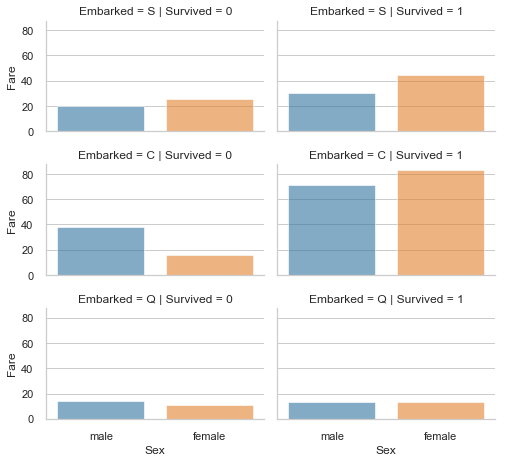

In [16]:
grid = sns.FacetGrid(train_df, row='Embarked', col='Survived', height=2.2, aspect=1.6)
grid.map(sns.barplot, 'Sex', 'Fare', 
         order=["male", "female"],
         palette="tab10",
         alpha=.6, ci=None)
grid.add_legend()

#### 6.5. How the port of embarcation relates to survival?

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

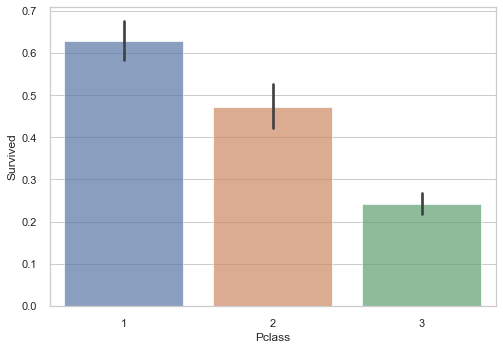

In [30]:
comb = pd.concat([train_df, train_df])
sns.barplot(x='Pclass', y='Survived', data=comb, alpha=.7)

#### 6.6. How the passenger Age relates to the Survival.

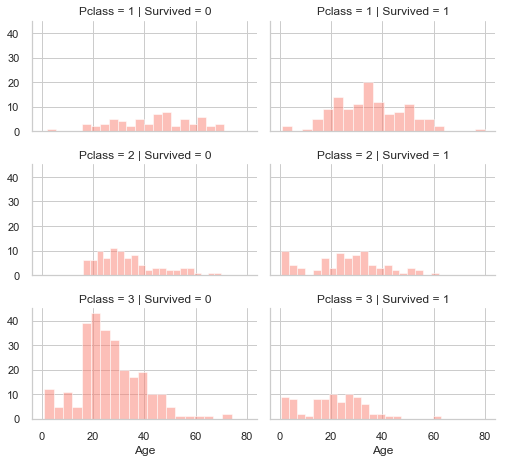

In [10]:
grid = sns.FacetGrid(train_df, col='Survived', row='Pclass', height=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', color="salmon", alpha=.5, bins=20)
grid.add_legend();

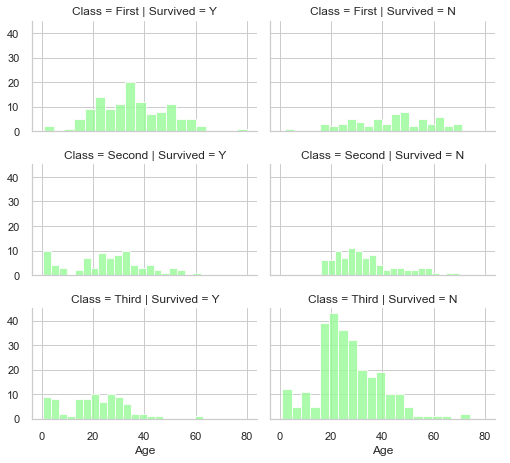

In [31]:
temp_df = train_df.copy()
temp_df['Survived'] = temp_df['Survived'].map(lambda x:  {1: 'Y', 0: 'N'}.get(x, 'E'))
temp_df['Class'] = temp_df['Pclass'].map(lambda x: {1: 'First', 2: 'Second', 3:'Third'}.get(x, 'E'))
temp_df.sort_values('Class', inplace=True)

grid = sns.FacetGrid(temp_df, col='Survived', row='Class', height=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', color="palegreen", alpha=.8, bins=20)
grid.add_legend();

#### 6.7. How ticket price affects survival of each gender?

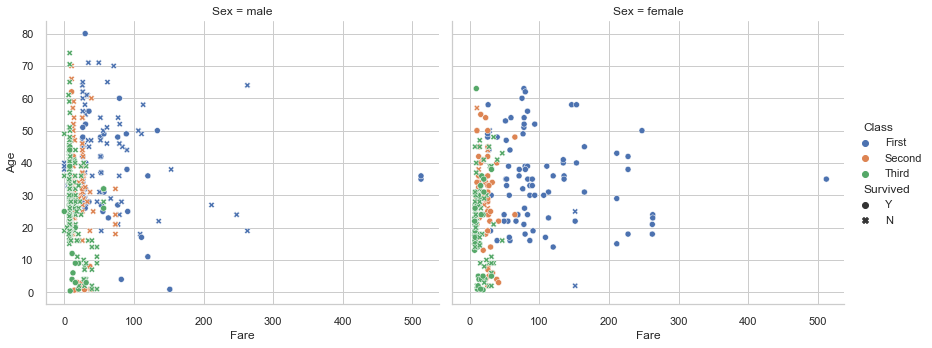

In [12]:
sns.relplot(
    x="Fare", y="Age", hue="Class", style="Survived", # size="Pclass",
    height=5, aspect=1.2, 
    col="Sex", data=temp_df
);


#### 6.8. Does the size of the group influences chances of survival?

In [32]:
def header(title, width=100):
    fmt_title = title + '&nbsp;' * (width - len(title))
    tpl = '<table style="width:{width}"><tr><th>{title}</th></tr></table>'
    html = tpl.format(title=fmt_title, width=width)
    return HTML(html)


data = [(' Train', train_df), (' Test', test_df)]
for label, dataset in data:
    dataset['relatives'] = dataset['SibSp'] + dataset['Parch']
    dataset.loc[dataset['relatives'] > 0, 'alone'] = 'No'
    dataset.loc[dataset['relatives'] == 0, 'alone'] = 'Yes'
    counted = dataset['alone'].value_counts().to_frame()
    display(header(label, 70))
    display(counted)


Train


,alone
Yes,537
No,354


Test


,alone
Yes,253
No,165


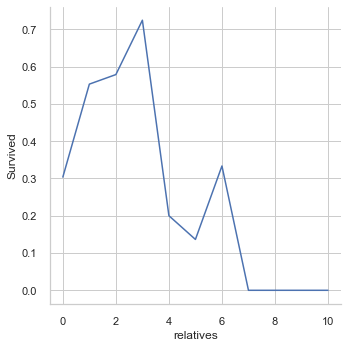

In [33]:
axes = sns.relplot(x="relatives", y="Survived", kind="line", ci=None, data=train_df)


<AxesSubplot:xlabel='Survived', ylabel='relatives'>

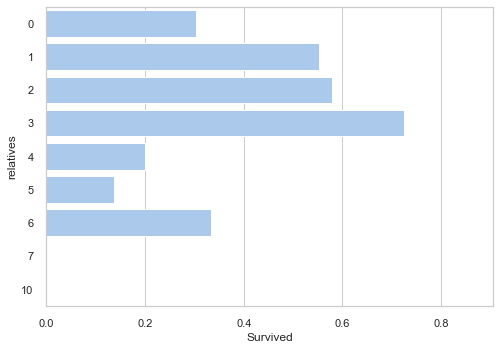

In [34]:
sns.set_theme(style="whitegrid")
sns.set_color_codes("pastel")
sns.barplot(y="relatives", x="Survived", data=train_df, orient='h', errwidth=0,
            label="Total", color="b")

<AxesSubplot:xlabel='relatives', ylabel='Survived'>

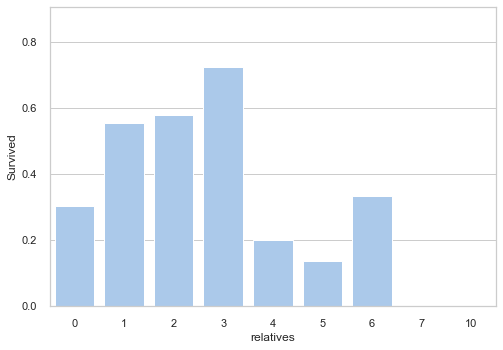

In [35]:
sns.set_theme(style="whitegrid")
sns.set_color_codes("pastel")
sns.barplot(x="relatives", y="Survived", data=train_df, orient='v', errwidth=0,
            label="Total", color="b")

#### 6.9. Feature engineering

In [21]:
# Using regex in python
import re
def extract_cabin_prefix(cabin): 
    return re.compile("([a-zA-Z])").search(cabin).group()

print(extract_cabin_prefix('U1223'))
print(extract_cabin_prefix('A 13'))
print(extract_cabin_prefix('X 13'))


U
A
X


In [26]:
import re
def extract_hack(cabin): 
    return re.compile("[a-zA-Z]([0-9]*)").search(cabin).group(1)

print(extract_hack('U1223x'))
print(extract_hack('A93x'))
print(extract_hack('A03x'))
print(extract_hack('A1x'))

1223
93
03
1


##### 6.9.1 Deck Variable

In [38]:
# Creating a new field 'Deck'
new_train = train_df
new_test = test_df
data = [new_train, new_test]

# Mapping first char to a specific location in the boat.
decks = {"A": 1, "B": 2, "C": 3, "D": 4, "E": 5, "F": 6, "G": 7, "U": 8}
def get_deck(cabin): 
    prefix = extract_cabin_prefix(cabin)
    return decks.get(prefix, 0)

for dataset in data:
    dataset['Cabin'] = dataset['Cabin'].fillna("U0")   # Setting U0 Cabin if unknown.
    dataset['Deck'] = dataset['Cabin'].map(get_deck)
    dataset['Deck'] = dataset['Deck'].astype(int)
# Drop the 'cabin' column as we already extracted Deck.
new_train = new_train.drop(['Cabin'], axis=1)
new_test = new_test.drop(['Cabin'], axis=1)

In [39]:
import re
# Mapping first char to a specific location in the boat.
deck = {"A": 1, "B": 2, "C": 3, "D": 4, "E": 5, "F": 6, "G": 7, "U": 8}
new_train = train_df
new_test = test_df
data = [new_train, new_test]

def extract_letter_prefix(x):
    return re.compile("([a-zA-Z]+)").search(x).group()

for dataset in data:
    dataset['Cabin'] = dataset['Cabin'].fillna("U0")   # Setting U0 Cabin if unknown.
    dataset['Deck'] = dataset['Cabin'].map(extract_letter_prefix)
    dataset['Deck'] = dataset['Deck'].map(deck)
    dataset['Deck'] = dataset['Deck'].fillna(0)
    dataset['Deck'] = dataset['Deck'].astype(int)
# Drop the cabin as we already extracted Deck.
new_train = new_train.drop(['Cabin'], axis=1)
new_test = new_test.drop(['Cabin'], axis=1)


#### 6.9.2 How passenger deck relates with Survival and Not Survival

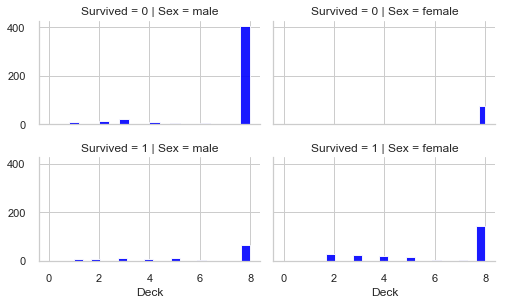

In [40]:
grid = sns.FacetGrid(new_train, row='Survived', col='Sex', height=2.2, aspect=1.6)
grid.map(plt.hist, 'Deck', color="blue", alpha=.9, bins=20)
grid.add_legend()

In [42]:
display(HTML(new_train.head().to_html()))

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,relatives,alone,Deck
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,No,8
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C,1,No,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,Yes,8
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1,No,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0,Yes,8



#### 6.9.3 Fixing the Age variable.

In [77]:
# Populate the age with a random distribution centered on 'mean' value with 'std' spread.
data = [new_train,  new_test]

for dataset in data:
    mean = dataset["Age"].mean()
    std = dataset["Age"].std()
    is_null = dataset["Age"].isnull().sum()
    # compute random numbers between the mean, std and is_null
    # Only assign ages larger than 5.
    rand_age = np.maximum([5], np.random.randint(mean - std, mean + std, size = is_null)) 
    # fill NaN values in Age column with random values generated
    age_slice = dataset["Age"].copy()
    age_slice[np.isnan(age_slice)] = rand_age
    dataset["Age"] = age_slice
    dataset["Age"] = dataset["Age"].astype(int)


#### 6.9.4 Fixing the Embarked variable

In [23]:
# Complete with most common value.
# common_value = 'S'
common_value = new_train['Embarked'].value_counts().idxmax()
print('Most common Port: {0}'.format(common_value))

print('--- Train before ---')
print(new_train['Embarked'].describe())
new_train['Embarked'] = new_train['Embarked'].fillna(common_value)
print('--- Train after  ---')
print(new_train['Embarked'].describe())

Most common Port: S
--- Train before ---
count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object
--- Train after  ---
count     891
unique      3
top         S
freq      646
Name: Embarked, dtype: object


#### 6.9.5. Dropping records in test data with NA in the Embark field.

In [24]:
# If there are Empty 'Embarked' fields in the test we should drop the record.
print(' ')
print('--- Test Data  ---')
print('Before and after removing NAs')
print('# Recs before: {0}'.format(new_test.shape[0]))
new_test = new_test[new_test['Embarked'].notna()]
print('# Recs after : {0}'.format(new_test.shape[0]))


 
--- Test Data  ---
Before and after removing NAs
# Recs before: 418
# Recs after : 418


#### 6.9.6 Adjusting the fare feature

In [30]:
new_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    int64  
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
 11  relatives    891 non-null    int64  
 12  alone        891 non-null    object 
 13  Deck         891 non-null    int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 97.6+ KB


Fare:
Converting “Fare” from float to int64, using the “astype()” function pandas provides:

In [25]:
print('--- Train  ---')
print('Set train Fare to average fare')
mean_fare = dataset["Fare"].mean()
new_train['Fare'] = new_train['Fare'].fillna(mean_fare).astype(int)

print(' ')
print('--- Drop test records with empty Fare ---')
print('# Recs before: {0}'.format(new_test.shape[0]))
new_test = new_test[new_test['Fare'].notna()]
new_test['Fare'] = new_test['Fare'].astype(int)
print('# Recs after : {0}'.format(new_test.shape[0]))


--- Train  ---
Set train Fare to average fare
 
--- Drop test records with empty Fare ---
# Recs before: 418
# Recs after : 417


#### 6.9.7 Feature Family Size.

In [28]:
data = [new_train,  new_test]
for dataset in data:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1

def format_percent(value):
    return '{:,.1f}'.format(value * 100)

grouped = new_train[['FamilySize', 'Survived']].groupby(
    ['FamilySize'], as_index=False).mean().sort_values(
    by='Survived', ascending=False)
grouped['Survived'] = grouped['Survived'].map(format_percent)

tabulated = grouped.rename(columns={
    'FamilySize': 'Family Size', 'Survived': '% Survided'})
tabulated.style.hide_index()


Family Size,% Survided
4,72.4
3,57.8
2,55.3
7,33.3
1,30.4
5,20.0
6,13.6
8,0.0
11,0.0


#### 6.9.8 Feature 'Port of embarkation'

In [29]:
def get_port_name(code):
    ports = {'C': 'Cherbourg', 'Q': 'Queenstown', 'S': 'Southampton'}
    return ports.get(code, '<Unknown>')


group_embarked = new_train[['Embarked', 'Survived']].groupby(
    ['Embarked'], as_index=False).mean().sort_values(
        by='Survived', ascending=False)
group_embarked['Survived'] = group_embarked['Survived'].map(format_percent)
group_embarked['Embarked'] = group_embarked['Embarked'].map(get_port_name)

tabulated = group_embarked.rename(columns={
    'Embarked': 'Port of embarkation', 'Survived': '% Survided'})
tabulated.style.hide_index()

Port of embarkation,% Survided
Cherbourg,55.4
Queenstown,39.0
Southampton,33.9


#### 6.9.9 Creating a new feature 'IsAlone'

In [30]:
def get_is_alone_str(is_alone):
    values = {0: 'No', 1: 'Yes'}
    return values.get(is_alone, '<Unknown>')


new_train['IsAlone'] = 0
new_train.loc[new_train['FamilySize'] == 1, 'IsAlone'] = 1

group_is_alone = new_train[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index=False).mean()
group_is_alone['Survived'] = group_is_alone['Survived'].map(format_percent)
group_is_alone['IsAlone'] = group_is_alone['IsAlone'].map(get_is_alone_str)
tabulated = group_is_alone.rename(columns={
    'IsAlone': 'Is passenger alone', 'Survived': '% Survided'})
tabulated.style.hide_index()

Is passenger alone,% Survided
No,50.6
Yes,30.4


### 7. Additional Plottings.

#### 7.1 Correlation of variables in the dataframe.

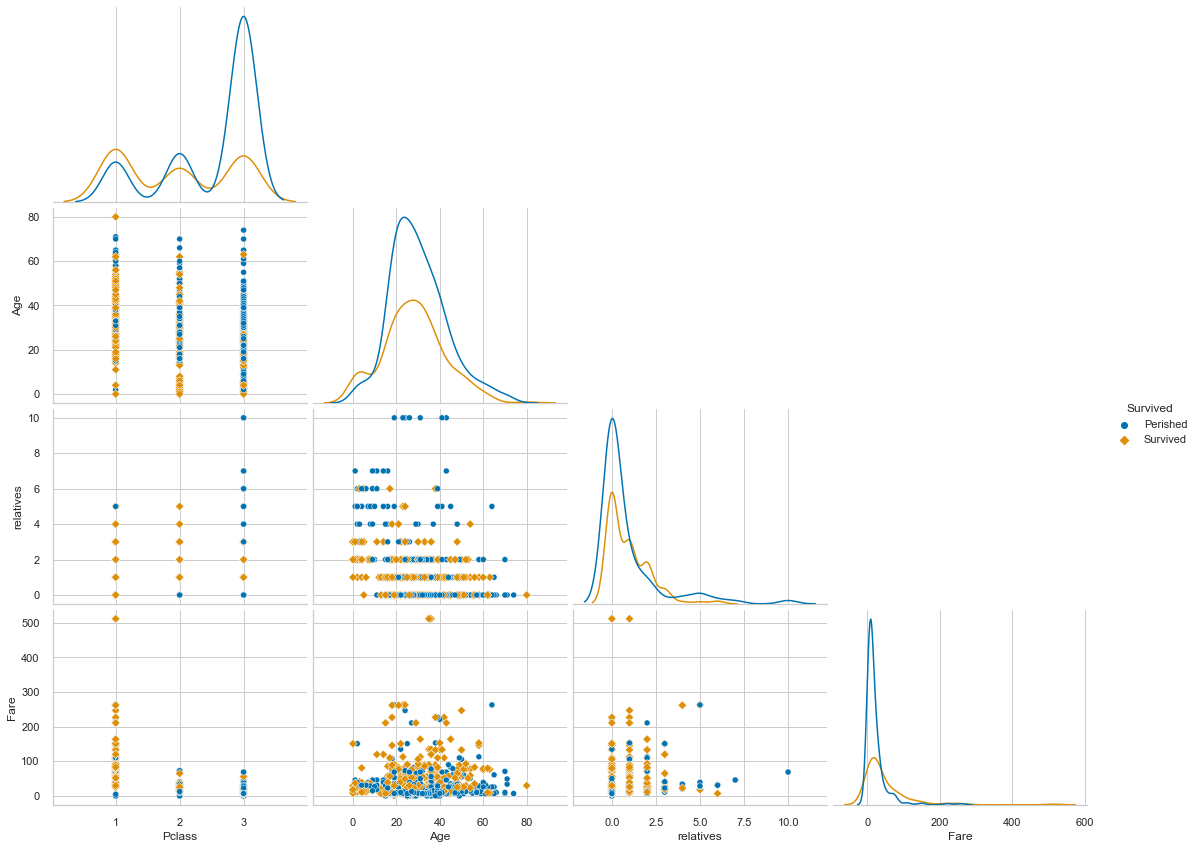

In [27]:
pairs_df = new_train[
    ['Pclass', 'Age', 'relatives', 'Fare', 'Survived']].copy()
survived_map =  {0: 'Perished', 1: 'Survived'}
pairs_df['Survived'] = pairs_df['Survived'].map(survived_map)
sns.pairplot(pairs_df, palette='colorblind', hue='Survived', corner=True,
             diag_kws=dict(fill=False), markers=["o", "D"], height=3, aspect=1.3) 

#### 7.2. Create a 'Heatmap' plot

In [31]:
# Numeric Features
numeric_features = ['Age', 'Fare']
# Categorical Features
ordinal_features = ['Pclass', 'SibSp', 'Parch']
nominal_features = ['Sex', 'Embarked']

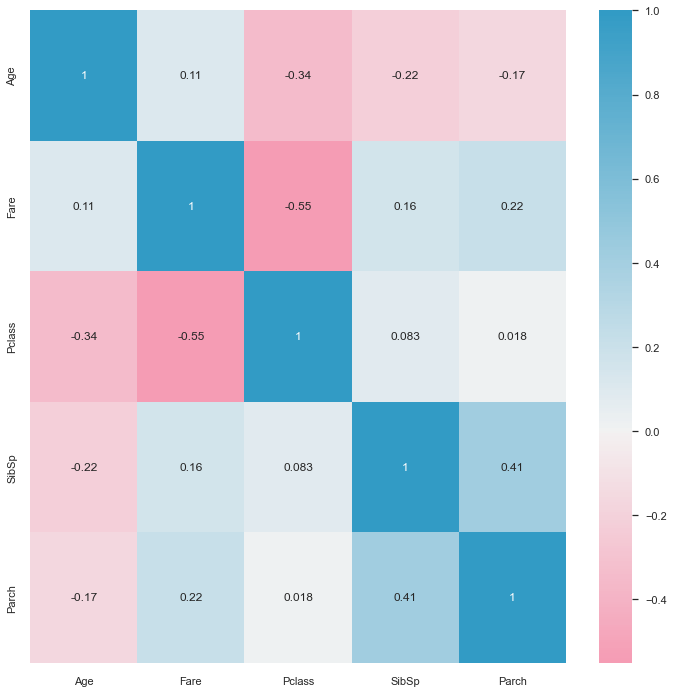

In [32]:
cor_matrix = new_train[numeric_features + ordinal_features].corr().round(3)
# Draw a heatmap 
fig = plt.figure(figsize=(12,12));
sns.heatmap(cor_matrix, annot=True, center=0, 
            cmap = sns.diverging_palette(0, 230, 90, 60, as_cmap=True),
            ax=plt.subplot(111));
plt.show()

### 8. Model Building